# TA section 5 - Model evaluation and cross validation with logistic regression 
### Fangming Xie, 10/28/2019



---

### Dataset: Titanic Passengers
This time we will learn using logistic regression for classification problem (whether a Titanic passenger survived).

The dataset is posted on Piazza under **Resources** -> **General Resources** -> **Section3_Titanic_Passengers_filter.csv**:
https://piazza.com/class_profile/get_resource/k0twu70kz3g3p0/k1qnqhs0coi553

For more information about the dataset:
https://www.kaggle.com/c/titanic/overview


In [5]:
#### Here are all the packages you need for the following tasks 
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn import metrics # a new package you will use this time
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
# --- setting up a fairly elegant plotting style
import seaborn as sns
sns.set_style('ticks', rc={'axes.grid':True})
sns.set_context('talk')
# --- end setting up styles

#### Task 1: Loading data 
Load the data table into jupyter notebook, display its size and first few rows

In [6]:
file = 'Section3_Titanic_Passengers_filtered.csv'
df = pd.read_csv(file) 
print(df.shape)
df.head()

(714, 12)


,Survived,Pclass,Last Name,First Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


#### Task 2: Logistic regression
- Fit a linear regression of **Survived** vs **Fare** (x) and report fitting results

Hint: use the following code as a template. Check documentation as you needed.

In [3]:
# assume your data is stored in "df" variable
results = smf.logit('', data=df).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.631130
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      712
Method:                           MLE   Df Model:                            1
Date:                Mon, 28 Oct 2019   Pseudo R-squ.:                 0.06559
Time:                        10:52:46   Log-Likelihood:                -450.63
converged:                       True   LL-Null:                       -482.26
                                        LLR p-value:                 1.809e-15
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8968      0.108     -8.334      0.000      -1.108      -0.686
Fare           0.0160      0.003      6.394      0.000       0.011       0.021
==============================================================================
"""

#### Task 3: Confusion matrix and its derived metrics (Sensitivity, Specificity, false positive rate, ...)
- for all passengers, predict whether he/she survived based on the model with threshold=0.5. (Predict he/she survived if the chance of survival is > 0.5)
- get confusion matrix
- calculate metrics derived from confusion matrix:
    - Sensitivity
    - Specificity
    - False positive rate
    - True positive rate
    - Precison
    - Recall
    - Accuracy
    - Error rate
    
Hint: expand the examples below.

In [4]:
threshold = 0.5
df['pred_Survived'] = (results.predict() > threshold).astype(int) # model predictions on data points
conf_mat = metrics.confusion_matrix(df['Survived'], df['pred_Survived']) # confusion matrix
conf_mat

array([[392,  32],
       [204,  86]])

In [5]:
def sensitivity(conf_mat):
    return conf_mat[1, 1]/np.sum(conf_mat[1, :])

print(sensitivity(conf_mat))



print(specificity(conf_mat))
print(true_positive_rate(conf_mat))
print(false_positive_rate(conf_mat))
print(precision(conf_mat))
print(recall(conf_mat))
print(accuracy(conf_mat))
print(error_rate(conf_mat))


0.296551724137931
0.9245283018867925
0.296551724137931
0.07547169811320753
0.7288135593220338
0.296551724137931
0.6694677871148459
0.3305322128851541


#### Task 4: Changing threshold; ROC curve 
- Repeat task 3 with 100 different thresholds equally spaced between 0 and 1
- Record true positive rate (TPR) and false positive rate (FPR) for each threshold
- Plotting: FPR vs threshold; TPR vs threshold; TPR vs FPR (ROC curve)

Hint: use the following code as a template. Check documentation as you needed.

In [6]:
thresholds = np.linspace(0, 1, 100)
tprs = []
fprs = []

for threshold in thresholds:
    # do one round; get tpr and fpr
    
    # record
    tprs.append(tpr)
    fprs.append(fpr)

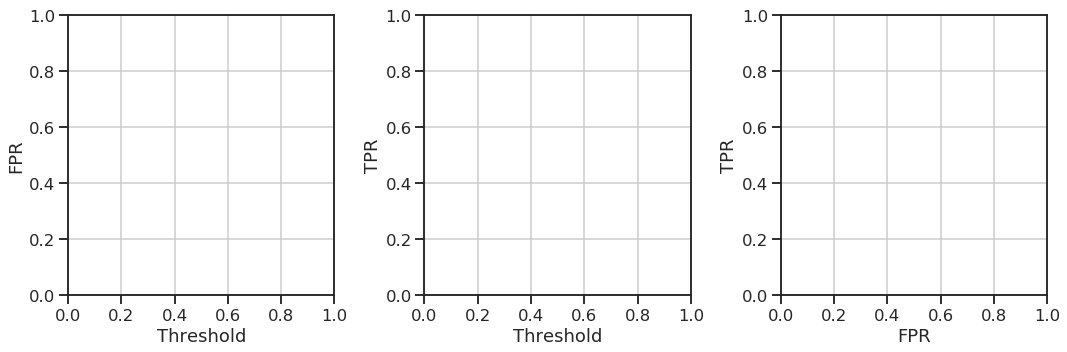

In [3]:
fig, axs = plt.subplots(1, 3, figsize=(5*3, 5))
ax = axs[0]
ax.set_xlabel('Threshold')
ax.set_ylabel('FPR')
ax = axs[1]
ax.set_xlabel('Threshold')
ax.set_ylabel('TPR')
ax = axs[2]
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')

fig.tight_layout()
plt.show()

#### Task 5: kfold cross validation
- repeat task 3 with 5-fold cross validation
- record training error rate and test error rate for each fold
- report mean error rate across 5 folds

Hint: use the following code as a template. Check documentation as you needed.

In [13]:
def accuracy(conf_mat):
    return (conf_mat[0, 0] + conf_mat[1, 1])/np.sum(np.ravel(conf_mat))
def error_rate(conf_mat):
    return 1 - accuracy(conf_mat) 

In [14]:
k = 5 
threshold = 0.5
kf = KFold(n_splits=k, shuffle=True)
train_trrs = []
test_trrs = []

for train_index, test_index in kf.split(df):
    df_train = df.iloc[train_index, :]
    df_test = df.iloc[test_index, :]
    
    # logistic regression on training data
    res = smf.logit('', data=).fit(disp=0)
    
    # training total error rate 
    train_pred = (res.predict(df_train) > threshold).astype(int)
    train_conf_mat = metrics.confusion_matrix(df_train['Survived'], train_pred)
    train_trr = error_rate(train_conf_mat)
    
    # test total error rate 
    
    
    # record training error and test error
    train_trrs.append(train_trr)
    test_trrs.append(test_trr)
    
# summarize results into a table
res_table = pd.DataFrame()
res_table['training error rate'] = train_trrs
res_table['test error rate'] = test_trrs
res_table
    

,training error rate,test error rate
0,0.325744,0.349650
1,0.338004,0.356643
2,0.332750,0.307692
3,0.330998,0.300699
4,0.337413,0.366197


In [15]:
res_table.mean()

training error rate    0.332982
test error rate        0.336176
dtype: float64